#### Import Packages

In [1]:
import pandas as pd
import pickle
import json
import numpy as np

from openai import OpenAI
from sklearn.metrics.pairwise import cosine_similarity

from utils.system import *
from class_data.data import Data
from class_generate.generate import Generate

import warnings
warnings.filterwarnings('ignore')

#### Load Data

In [2]:
# Load tfidf
path = get_root_dir() / 'exec_bow' / 'tfidf.pkl'
with open(path, 'rb') as file:
    tfidf_vectorizer = pickle.load(file)

In [3]:
# Load tfidf data
wsj_tfidf = Data(folder_path=get_format_data() / 'tfidf', file_pattern='wsj_tfidf_*')
wsj_tfidf = wsj_tfidf.concat_files()

In [4]:
# Load articles
wsj_art = Data(folder_path=get_format_data() / 'token', file_pattern='wsj_tokens_*')
wsj_art = wsj_art.concat_files()

#### TFIDF Plot

In [5]:
# Params
type = 'tfidf'
vector_column = 'tfidf'
method = 'cos_sim'
interval = 'M'

Here is the query: 
{'unigram': ['esg', 'environmental', 'governance'], 'bigram': ['environmental social', 'social governance', 'companies environmental'], 'trigram': ['environmental social governance', 'companies environmental practices', 'social governance issues'], 'start_date': '1984-01-02', 'end_date': '2021-12-31'}
------------------------------------------------------------
Computing score...
------------------------------------------------------------
Processing ngram: esg


Processing batches...: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 84/84 [00:12<00:00,  6.87it/s]


------------------------------------------------------------
Processing ngram: environmental


Processing batches...: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 84/84 [00:12<00:00,  6.93it/s]


------------------------------------------------------------
Processing ngram: governance


Processing batches...: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 84/84 [00:12<00:00,  6.79it/s]


------------------------------------------------------------
Processing ngram: environmental social


Processing batches...: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 84/84 [00:12<00:00,  6.92it/s]


------------------------------------------------------------
Processing ngram: social governance


Processing batches...: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 84/84 [00:12<00:00,  6.89it/s]


------------------------------------------------------------
Processing ngram: companies environmental


Processing batches...: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 84/84 [00:12<00:00,  6.89it/s]


------------------------------------------------------------
Processing ngram: environmental social governance


Processing batches...: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 84/84 [00:12<00:00,  6.86it/s]


------------------------------------------------------------
Processing ngram: companies environmental practices


Processing batches...: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 84/84 [00:12<00:00,  6.68it/s]


------------------------------------------------------------
Processing ngram: social governance issues


Processing batches...: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 84/84 [00:12<00:00,  6.57it/s]


<Axes: xlabel='date'>

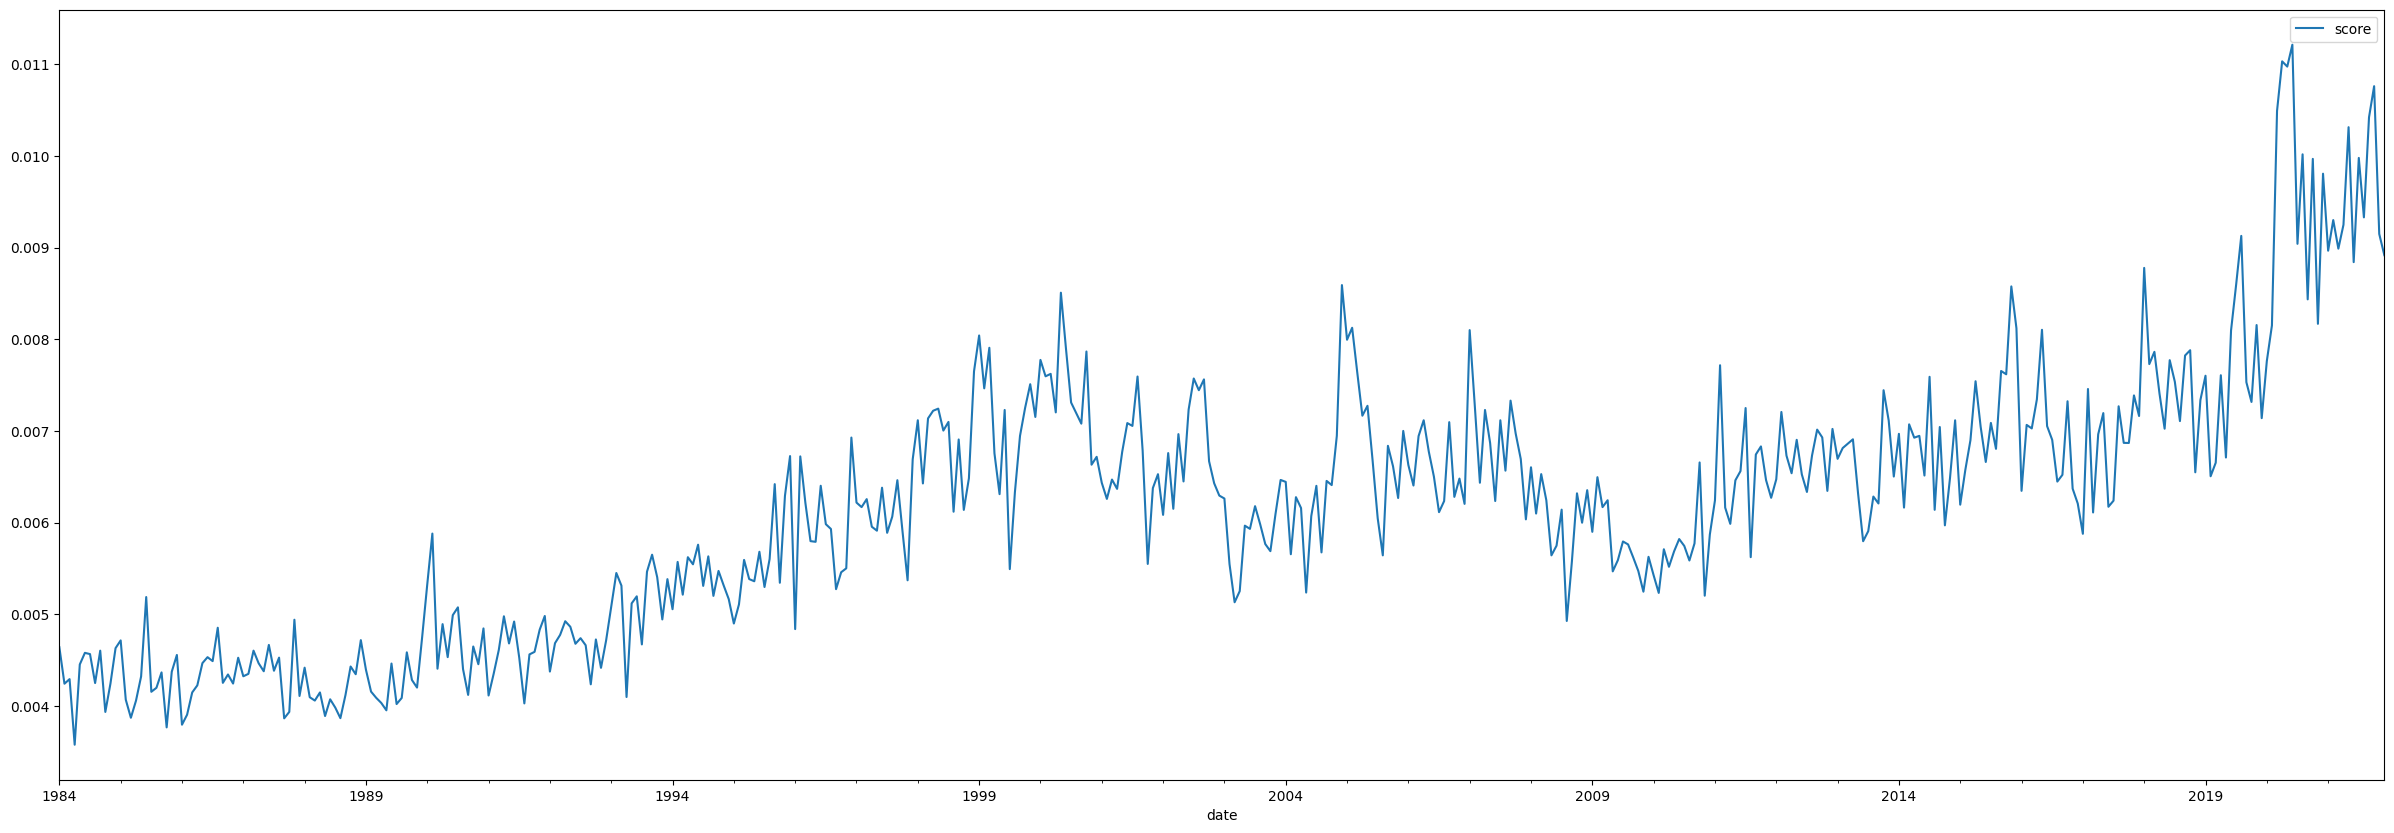

In [6]:
query = 'Generate an index with label ESG from 1984-01-02 to 2021-12-31'
generate = Generate(query=query, 
                    type=type, 
                    vector_data=wsj_tfidf, 
                    vector_column=vector_column, 
                    article_data=wsj_art, 
                    tfidf=tfidf_vectorizer,
                    method=method,
                    interval=interval)
esg = generate.generate_tfidf()
esg.plot(figsize=(30,10))

Here is the query: 
{'unigram': ['economic', 'policy', 'uncertainty'], 'bigram': ['economic policy', 'policy uncertainty', 'uncertainty in'], 'trigram': ['economic policy uncertainty', 'uncertainty in economies', 'fluctuations in policy'], 'start_date': '1984-01-02', 'end_date': '2021-12-31'}
------------------------------------------------------------
Computing score...
------------------------------------------------------------
Processing ngram: economic


Processing batches...: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 84/84 [00:13<00:00,  6.29it/s]


------------------------------------------------------------
Processing ngram: policy


Processing batches...: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 84/84 [00:12<00:00,  6.57it/s]


------------------------------------------------------------
Processing ngram: uncertainty


Processing batches...: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 84/84 [00:12<00:00,  6.68it/s]


------------------------------------------------------------
Processing ngram: economic policy


Processing batches...: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 84/84 [00:12<00:00,  6.71it/s]


------------------------------------------------------------
Processing ngram: policy uncertainty


Processing batches...: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 84/84 [00:12<00:00,  6.92it/s]


------------------------------------------------------------
Processing ngram: uncertainty in


Processing batches...: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 84/84 [00:11<00:00,  7.04it/s]


------------------------------------------------------------
Processing ngram: economic policy uncertainty


Processing batches...: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 84/84 [00:12<00:00,  6.99it/s]


------------------------------------------------------------
Processing ngram: uncertainty in economies


Processing batches...: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 84/84 [00:12<00:00,  6.83it/s]


------------------------------------------------------------
Processing ngram: fluctuations in policy


Processing batches...: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 84/84 [00:12<00:00,  6.93it/s]


<Axes: xlabel='date'>

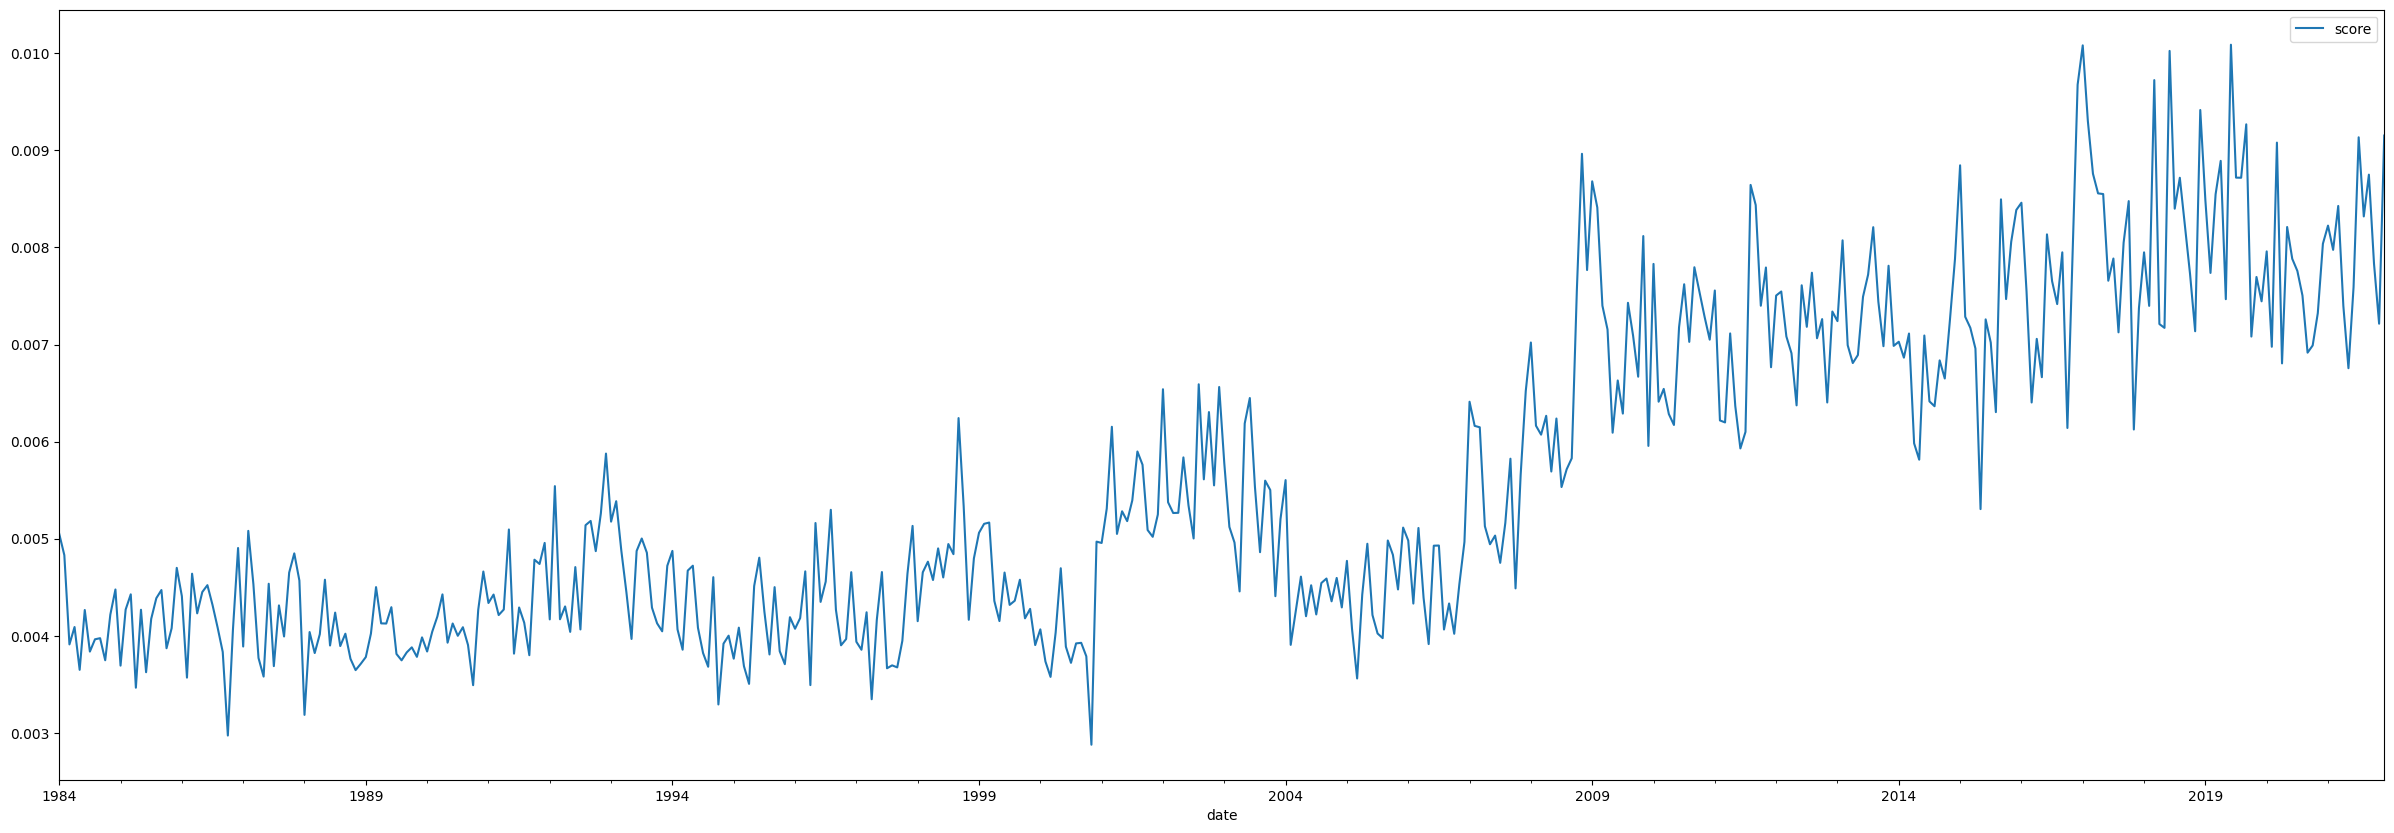

In [7]:
query = 'Generate an index with label Economic Policy Uncertainty from 1984-01-02 to 2021-12-31'
generate = Generate(query=query, 
                    type=type, 
                    vector_data=wsj_tfidf, 
                    vector_column=vector_column, 
                    article_data=wsj_art, 
                    tfidf=tfidf_vectorizer,
                    method=method,
                    interval=interval)
epu = generate.generate_tfidf()
epu.plot(figsize=(30,10))

In [14]:
for row in esg.tail(10).iterrows():
    print("-"*60)
    print(row[1]['headline'])

------------------------------------------------------------
Nasdaq Amends Its Diversity Plan ---- By Adena T. Friedman
------------------------------------------------------------
U.S. News: Funds to Come From Corporate Tax Boost ---- By Richard Rubin
------------------------------------------------------------
Bosses Who Forbid Office Political Talk Trigger Hot Debate ---- By Katherine Bindley
------------------------------------------------------------
Heard on the Street: Clean Freaks Can't Save These Stocks ---- By Aaron Back
------------------------------------------------------------
U.S. News: Florida Law Targeting Social Media Blocked ---- By Jacob Gershman
------------------------------------------------------------
U.S. News: As Economy Rebounds Big Companies' Clout Grows ---- By Tom Fairless
------------------------------------------------------------
U.S. News: Pandemic Weighs On Social Security ---- By Kate Davidson
--------------------------------------------------------

In [15]:
esg.tail(4).iloc[0]['body_txt']

'WASHINGTON  The severe economic downturn caused by the Covid19 pandemic last year weighed on the financial health of Social Security but not nearly as much as many forecasters originally feared according to new projections of the programs finances. Trustees for the Social Security trust fund in an annual report released Tuesday said the program is expected to pay benefits that exceed its income in 2021 the same as it anticipated last year at the outset of the pandemic. While the pandemic had a significant impact on the program the trustees said they expect Social Securitys reserves to be depleted by 2034 only one year sooner than they estimated in their April 2020 report. Once the reserves are exhausted benefits would be reduced automatically unless Congress steps in to shore up the program which lawmakers have done previously. The trustees now project elevated mortality rates related to the pandemic through 2023 and expect lower immigration and childbearing this year and next compare

Here is the query: 
{'unigram': ['trade', 'war', 'economic'], 'bigram': ['trade war', 'us china', 'economic conflict'], 'trigram': ['us china trade', 'china trade war', 'trade war economic'], 'start_date': '1984-01-02', 'end_date': '2021-12-31', 'label': "The label 'US-China Trade War' pertains to the economic conflict between two of the world's biggest economies, the United States and China. The war is characterized by a reciprocal increase in tariffs and other trade barriers. It has significant implications for global commerce and economics."}
------------------------------------------------------------
Computing score...
------------------------------------------------------------
Processing ngram: trade


Processing batches...: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 84/84 [00:12<00:00,  6.94it/s]


------------------------------------------------------------
Processing ngram: war


Processing batches...: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 84/84 [00:11<00:00,  7.05it/s]


------------------------------------------------------------
Processing ngram: economic


Processing batches...: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 84/84 [00:12<00:00,  7.00it/s]


------------------------------------------------------------
Processing ngram: trade war


Processing batches...: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 84/84 [00:12<00:00,  6.77it/s]


------------------------------------------------------------
Processing ngram: us china


Processing batches...: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 84/84 [00:13<00:00,  6.33it/s]


------------------------------------------------------------
Processing ngram: economic conflict


Processing batches...: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 84/84 [00:13<00:00,  6.43it/s]


------------------------------------------------------------
Processing ngram: us china trade


Processing batches...: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 84/84 [00:12<00:00,  6.63it/s]


------------------------------------------------------------
Processing ngram: china trade war


Processing batches...: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 84/84 [00:12<00:00,  6.78it/s]


------------------------------------------------------------
Processing ngram: trade war economic


Processing batches...: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 84/84 [00:12<00:00,  6.75it/s]


<Axes: xlabel='date'>

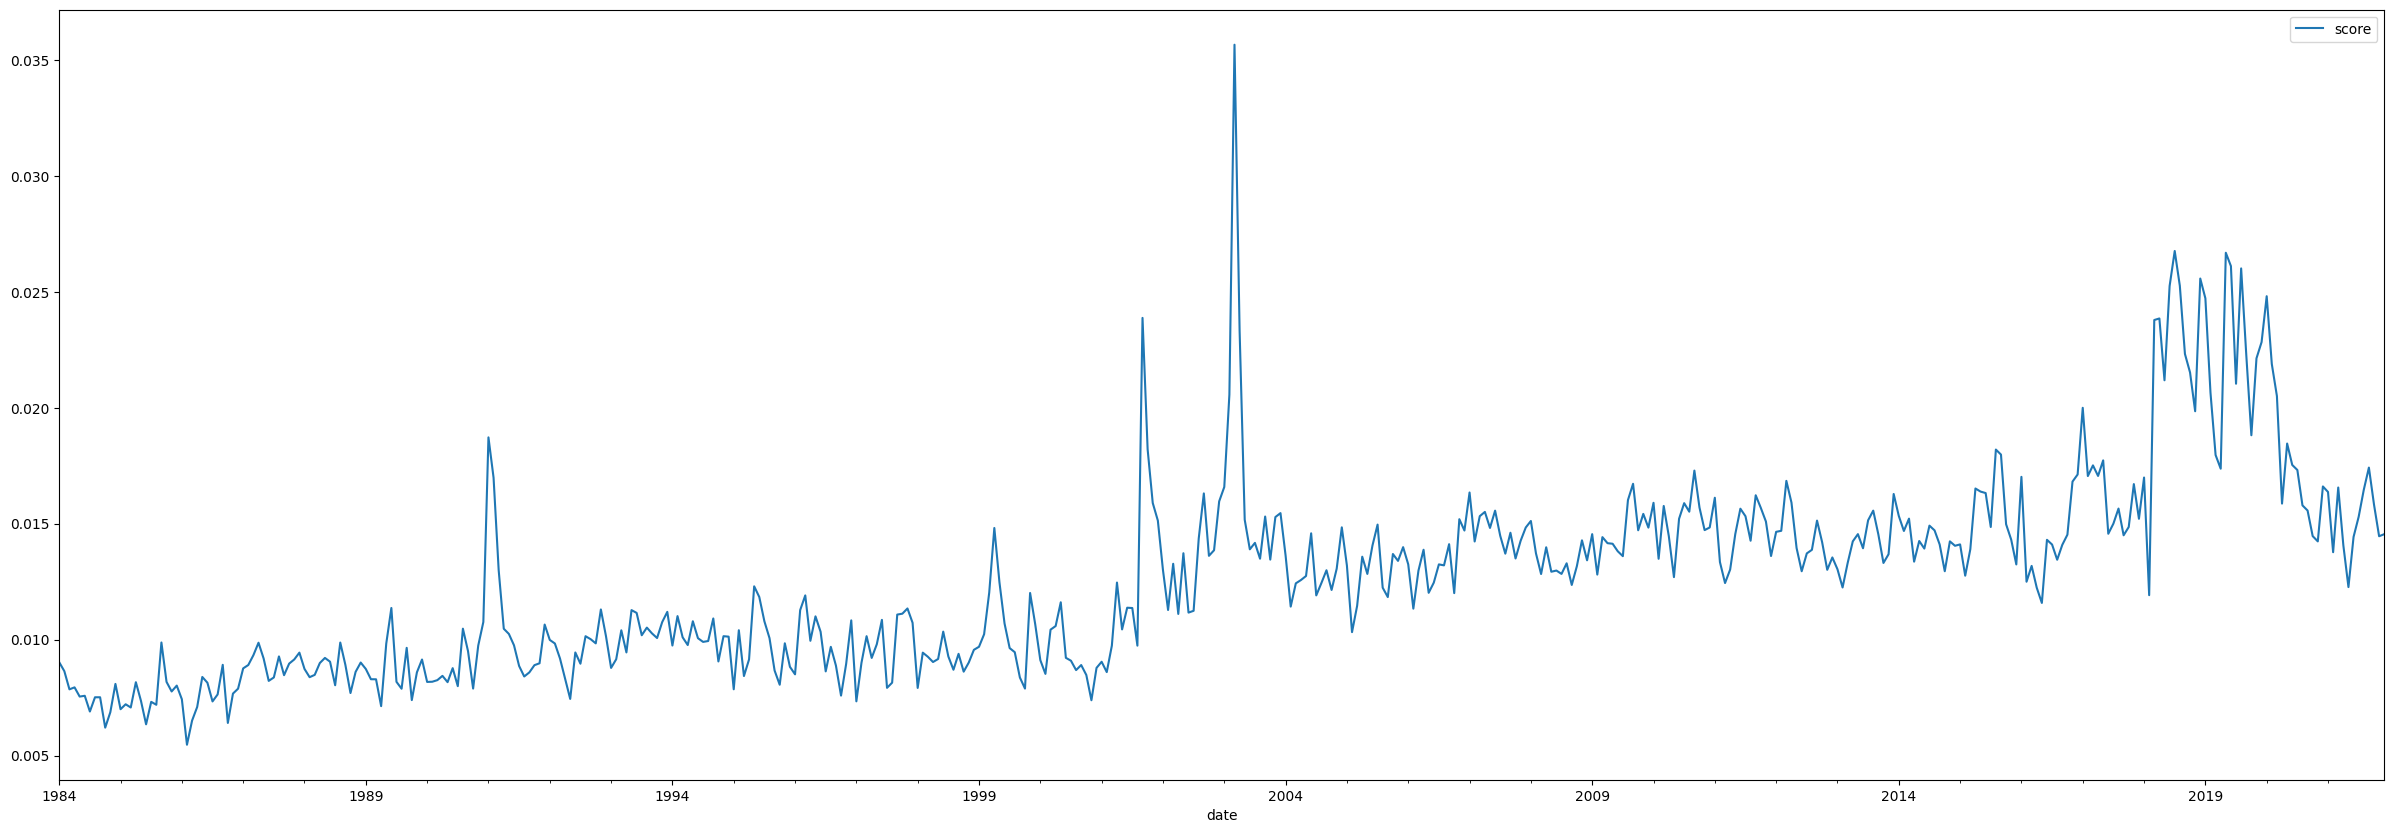

In [8]:
query = 'Generate an index with label US-China trade war from 1984-01-02 to 2021-12-31'
generate = Generate(query=query, 
                    type=type, 
                    vector_data=wsj_tfidf, 
                    vector_column=vector_column, 
                    article_data=wsj_art, 
                    tfidf=tfidf_vectorizer,
                    method=method,
                    interval=interval)
trade_war = generate.generate_tfidf()
trade_war.plot(figsize=(30,10))

Here is the query: 
{'unigram': ['artificial', 'intelligence', 'machines'], 'bigram': ['artificial intelligence', 'intelligence is', 'machines mimic'], 'trigram': ['artificial intelligence is', 'intelligence is the', 'machines mimic cognitive'], 'start_date': '1984-01-02', 'end_date': '2021-12-31'}
------------------------------------------------------------
Computing score...
------------------------------------------------------------
Processing ngram: artificial


Processing batches...: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 84/84 [00:13<00:00,  6.13it/s]


------------------------------------------------------------
Processing ngram: intelligence


Processing batches...: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 84/84 [00:11<00:00,  7.02it/s]


------------------------------------------------------------
Processing ngram: machines


Processing batches...: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 84/84 [00:12<00:00,  6.77it/s]


------------------------------------------------------------
Processing ngram: artificial intelligence


Processing batches...: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 84/84 [00:12<00:00,  6.94it/s]


------------------------------------------------------------
Processing ngram: intelligence is


Processing batches...: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 84/84 [00:12<00:00,  6.98it/s]


------------------------------------------------------------
Processing ngram: machines mimic


Processing batches...: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 84/84 [00:12<00:00,  6.55it/s]


------------------------------------------------------------
Processing ngram: artificial intelligence is


Processing batches...: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 84/84 [00:12<00:00,  6.91it/s]


------------------------------------------------------------
Processing ngram: intelligence is the


Processing batches...: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 84/84 [00:12<00:00,  6.59it/s]


------------------------------------------------------------
Processing ngram: machines mimic cognitive


Processing batches...: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 84/84 [00:13<00:00,  6.26it/s]


<Axes: xlabel='date'>

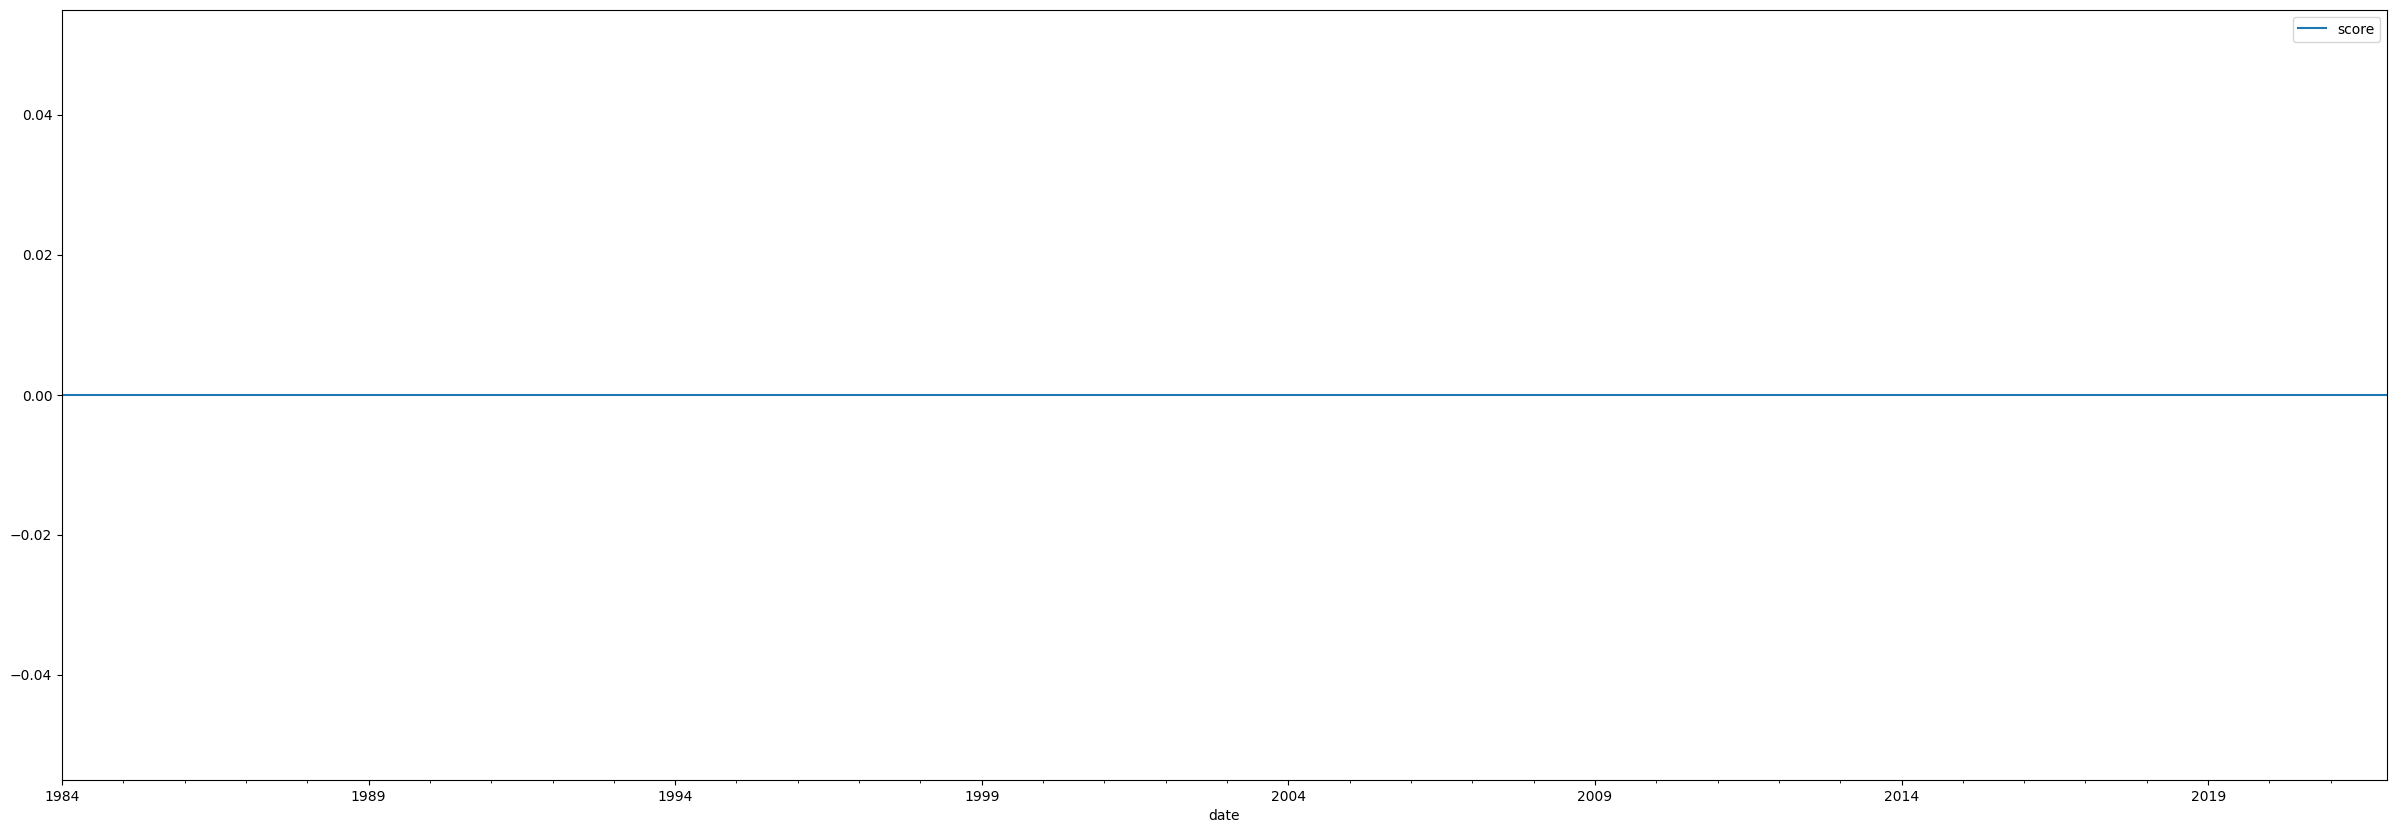

In [13]:
query = 'Generate an index with label artficial intelligence from 1984-01-02 to 2021-12-31'
generate = Generate(query=query, 
                    type=type, 
                    vector_data=wsj_tfidf, 
                    vector_column=vector_column, 
                    article_data=wsj_art, 
                    tfidf=tfidf_vectorizer,
                    method=method,
                    interval=interval)
ai = generate.generate_tfidf()
ai.plot(figsize=(30,10))

Here is the query: 
{'unigram': ['blockchain', 'digital', 'ledger'], 'bigram': ['blockchain technology', 'distributed ledger', 'secure transactions'], 'trigram': ['technology for secure transactions', 'chain of digital records', 'technology called blockchain technology'], 'start_date': '1984-01-02', 'end_date': '2021-12-31'}
------------------------------------------------------------
Computing score...
------------------------------------------------------------
Processing ngram: blockchain


Processing batches...: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 84/84 [00:12<00:00,  6.78it/s]


------------------------------------------------------------
Processing ngram: digital


Processing batches...: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 84/84 [00:11<00:00,  7.02it/s]


------------------------------------------------------------
Processing ngram: ledger


Processing batches...: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 84/84 [00:12<00:00,  6.95it/s]


------------------------------------------------------------
Processing ngram: blockchain technology


Processing batches...: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 84/84 [00:12<00:00,  6.79it/s]


------------------------------------------------------------
Processing ngram: distributed ledger


Processing batches...: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 84/84 [00:12<00:00,  6.92it/s]


------------------------------------------------------------
Processing ngram: secure transactions


Processing batches...: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 84/84 [00:12<00:00,  6.77it/s]


------------------------------------------------------------
Processing ngram: technology for secure transactions


Processing batches...: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 84/84 [00:13<00:00,  6.44it/s]


------------------------------------------------------------
Processing ngram: chain of digital records


Processing batches...: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 84/84 [00:13<00:00,  6.33it/s]


------------------------------------------------------------
Processing ngram: technology called blockchain technology


Processing batches...: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 84/84 [00:12<00:00,  6.61it/s]


<Axes: xlabel='date'>

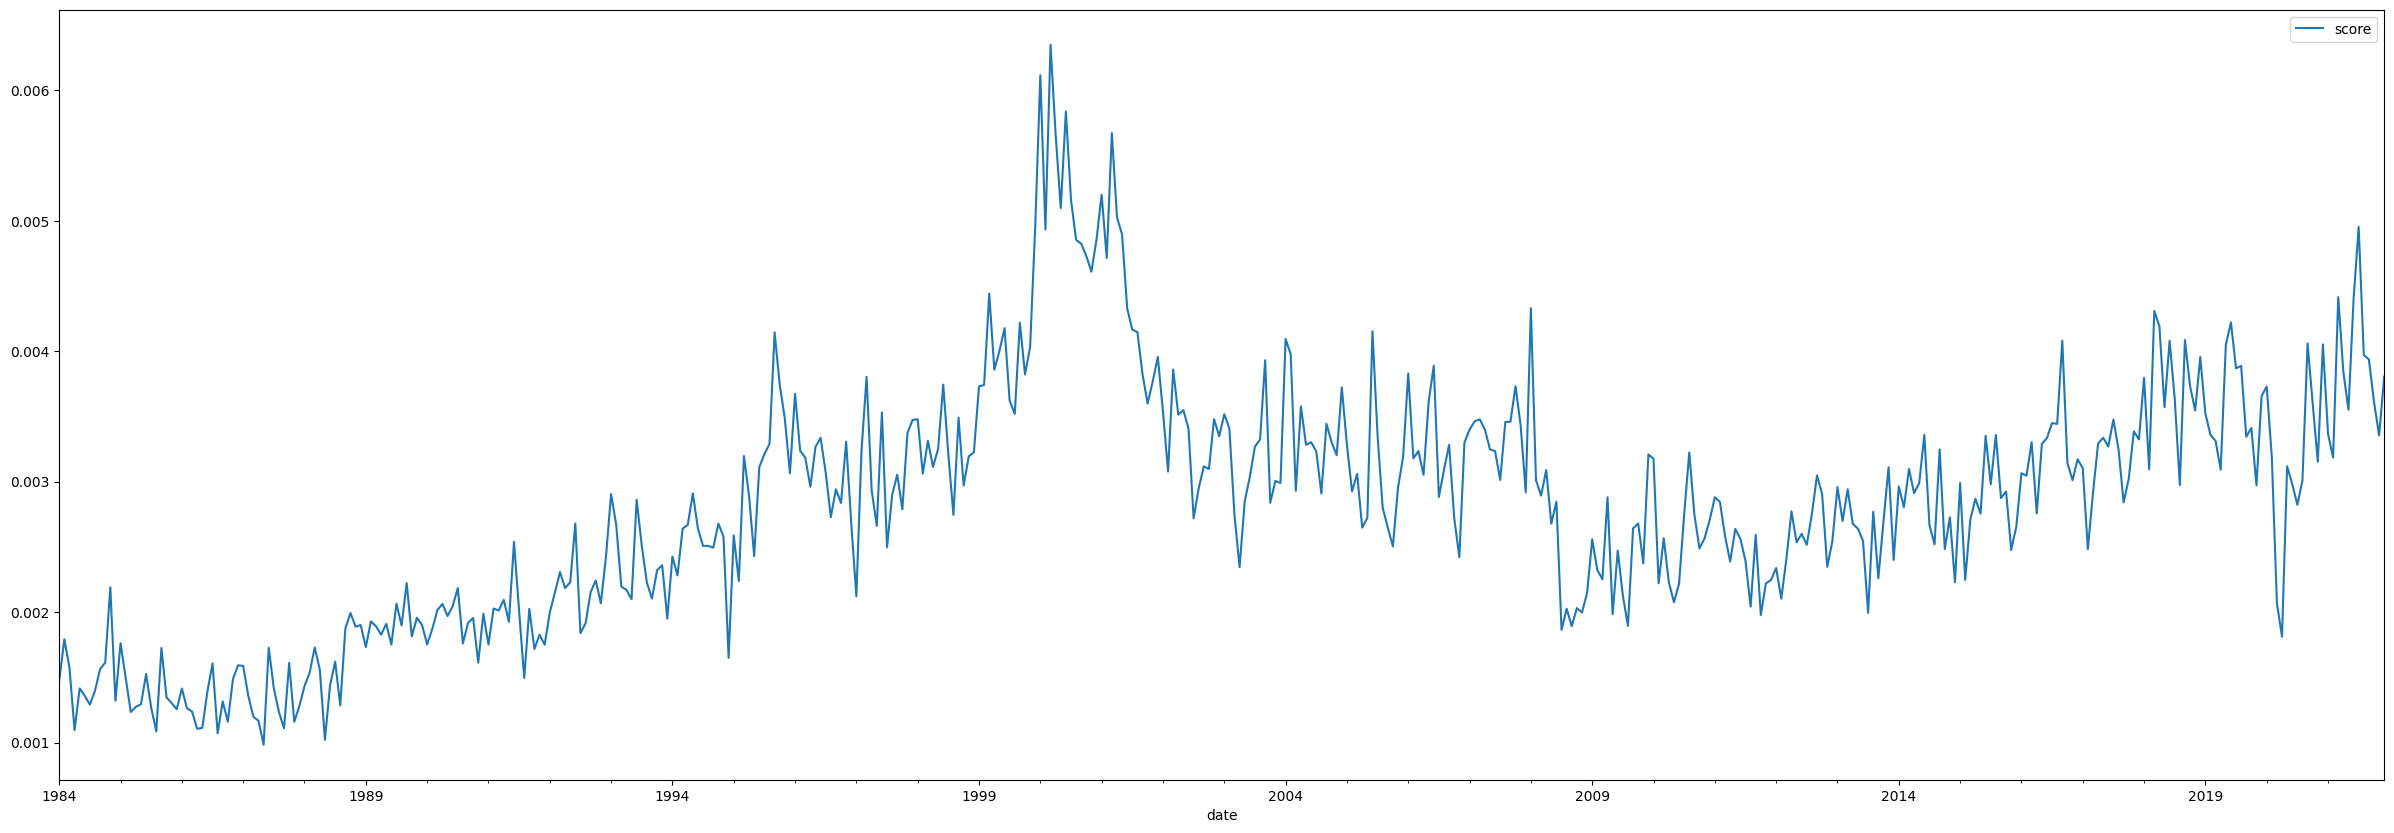

In [10]:
query = 'Generate an index with label blockchain from 1984-01-02 to 2021-12-31'
generate = Generate(query=query, 
                    type=type, 
                    vector_data=wsj_tfidf, 
                    vector_column=vector_column, 
                    article_data=wsj_art, 
                    tfidf=tfidf_vectorizer,
                    method=method,
                    interval=interval)
blockchain = generate.generate_tfidf()
blockchain.plot(figsize=(30,10))

Here is the query: 
{'unigram': ['covid', 'virus', 'pandemic'], 'bigram': ['novel coronavirus', 'coronavirus pandemic', 'global health'], 'trigram': ['covid 19 pandemic', '2019 novel coronavirus', 'global health emergency'], 'start_date': '1984-01-02', 'end_date': '2021-12-31'}
------------------------------------------------------------
Computing score...
------------------------------------------------------------
Processing ngram: covid


Processing batches...: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 84/84 [00:12<00:00,  6.69it/s]


------------------------------------------------------------
Processing ngram: virus


Processing batches...: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 84/84 [00:12<00:00,  6.73it/s]


------------------------------------------------------------
Processing ngram: pandemic


Processing batches...: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 84/84 [00:12<00:00,  6.75it/s]


------------------------------------------------------------
Processing ngram: novel coronavirus


Processing batches...: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 84/84 [00:12<00:00,  6.59it/s]


------------------------------------------------------------
Processing ngram: coronavirus pandemic


Processing batches...: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 84/84 [00:12<00:00,  6.62it/s]


------------------------------------------------------------
Processing ngram: global health


Processing batches...: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 84/84 [00:13<00:00,  6.42it/s]


------------------------------------------------------------
Processing ngram: covid 19 pandemic


Processing batches...: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 84/84 [00:12<00:00,  6.89it/s]


------------------------------------------------------------
Processing ngram: 2019 novel coronavirus


Processing batches...: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 84/84 [00:11<00:00,  7.15it/s]


------------------------------------------------------------
Processing ngram: global health emergency


Processing batches...: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 84/84 [00:12<00:00,  6.69it/s]


<Axes: xlabel='date'>

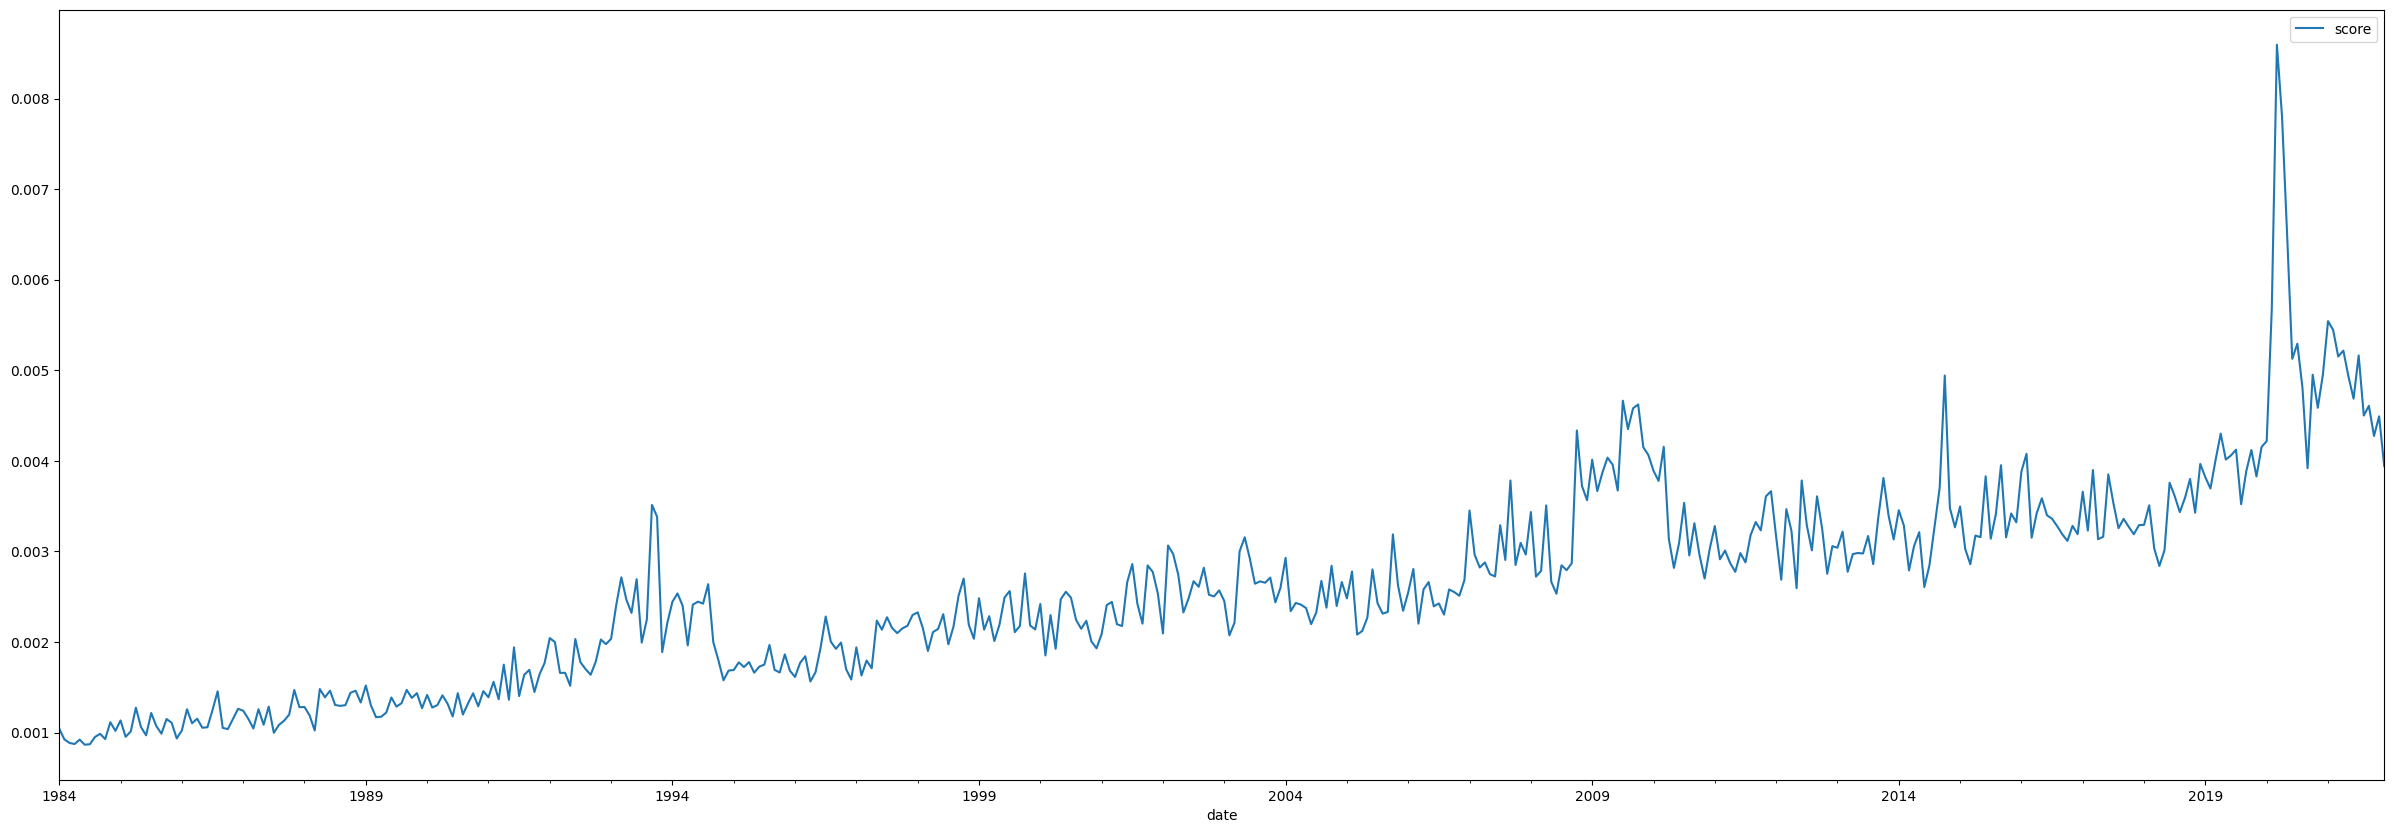

In [11]:
query = 'Generate an index with label covid from 1984-01-02 to 2021-12-31'
generate = Generate(query=query, 
                    type=type, 
                    vector_data=wsj_tfidf, 
                    vector_column=vector_column, 
                    article_data=wsj_art, 
                    tfidf=tfidf_vectorizer,
                    method=method,
                    interval=interval)
covid = generate.generate_tfidf()
covid.plot(figsize=(30,10))

Here is the query: 
{'unigram': ['economic', 'recession', 'period'], 'bigram': ['economic recession', 'recession period', 'period from'], 'trigram': ['economic recession period', 'recession period from', 'period from 1984'], 'start_date': '1984-01-02', 'end_date': '2021-12-31'}
------------------------------------------------------------
Computing score...
------------------------------------------------------------
Processing ngram: economic


Processing batches...: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 84/84 [00:11<00:00,  7.11it/s]


------------------------------------------------------------
Processing ngram: recession


Processing batches...: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 84/84 [00:12<00:00,  6.52it/s]


------------------------------------------------------------
Processing ngram: period


Processing batches...: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 84/84 [00:13<00:00,  6.31it/s]


------------------------------------------------------------
Processing ngram: economic recession


Processing batches...: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 84/84 [00:12<00:00,  6.80it/s]


------------------------------------------------------------
Processing ngram: recession period


Processing batches...: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 84/84 [00:12<00:00,  6.50it/s]


------------------------------------------------------------
Processing ngram: period from


Processing batches...: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 84/84 [00:13<00:00,  6.26it/s]


------------------------------------------------------------
Processing ngram: economic recession period


Processing batches...: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 84/84 [00:13<00:00,  6.17it/s]


------------------------------------------------------------
Processing ngram: recession period from


Processing batches...: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 84/84 [00:13<00:00,  6.37it/s]


------------------------------------------------------------
Processing ngram: period from 1984


Processing batches...: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 84/84 [00:12<00:00,  6.75it/s]


<Axes: xlabel='date'>

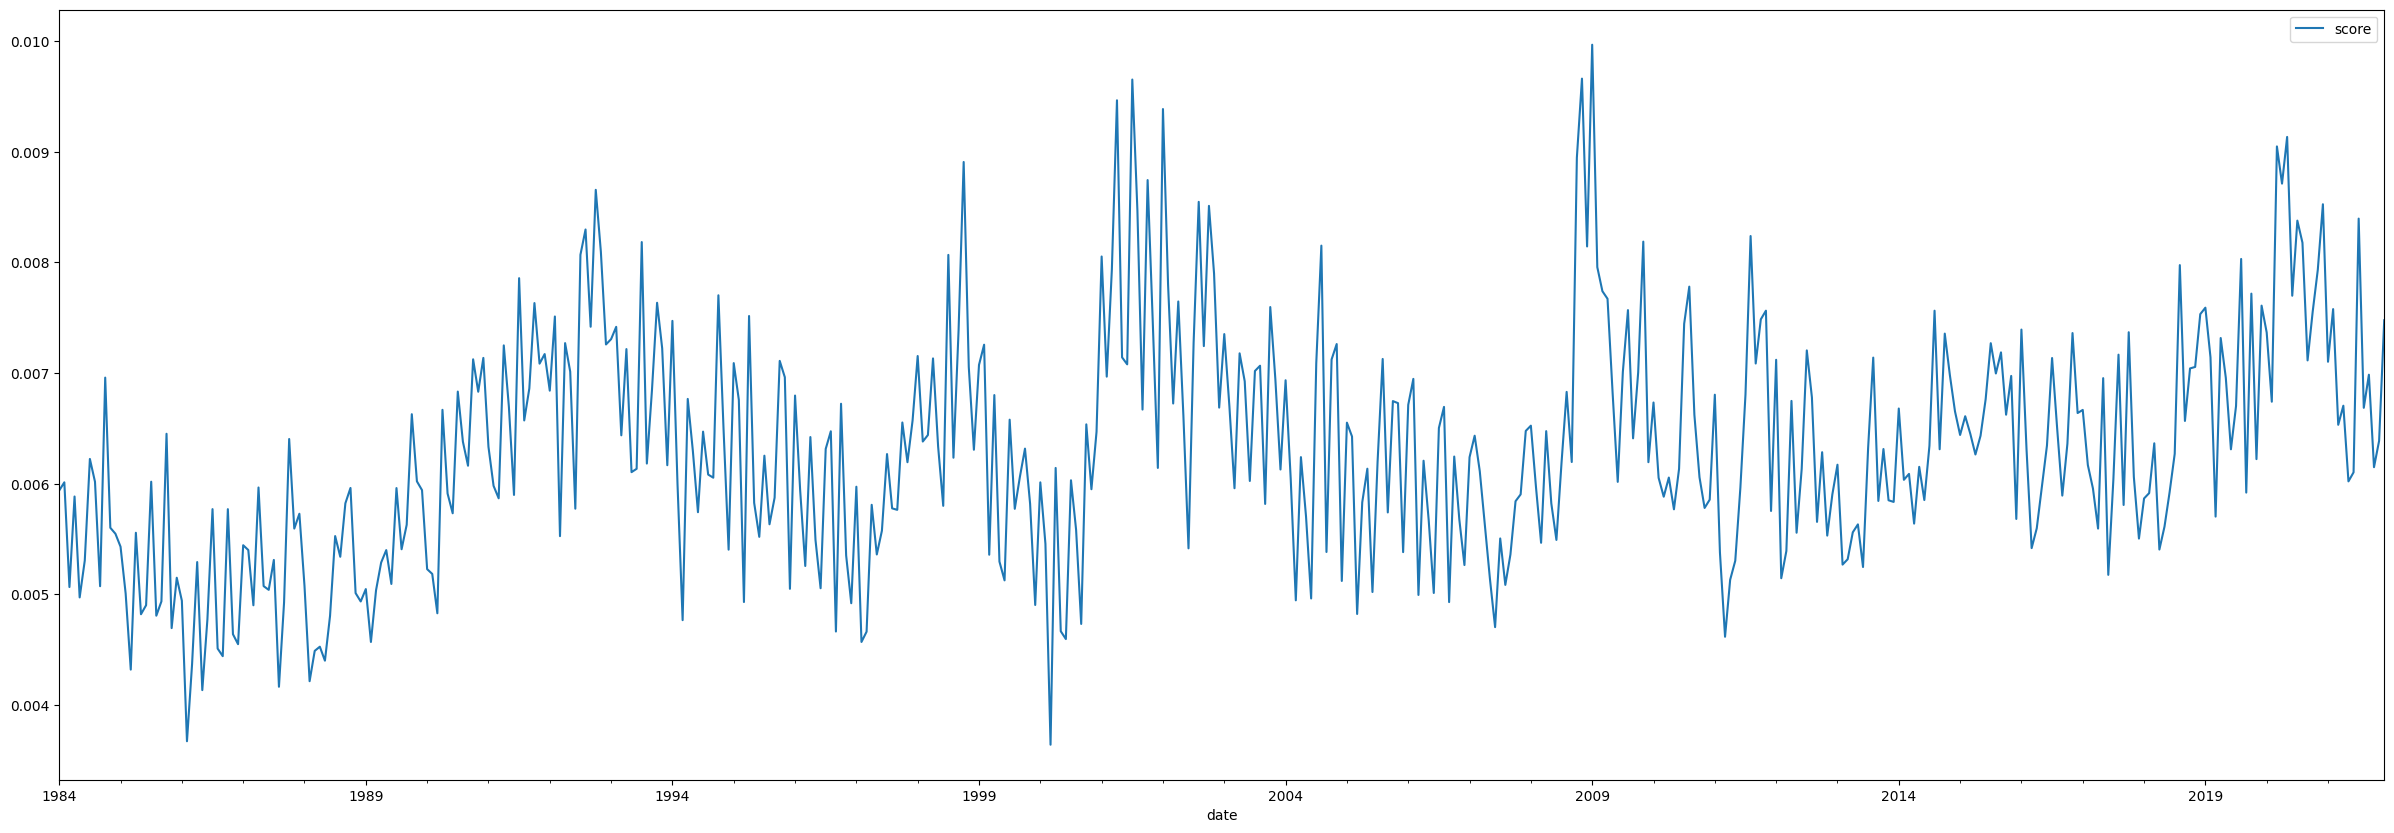

In [12]:
query = 'Generate an index with label economic recession from 1984-01-02 to 2021-12-31'
generate = Generate(query=query, 
                    type=type, 
                    vector_data=wsj_tfidf, 
                    vector_column=vector_column, 
                    article_data=wsj_art, 
                    tfidf=tfidf_vectorizer,
                    method=method,
                    interval=interval)
recess = generate.generate_tfidf()
recess.plot(figsize=(30,10))